## HPC EX 1

<IPython.core.display.Javascript object>


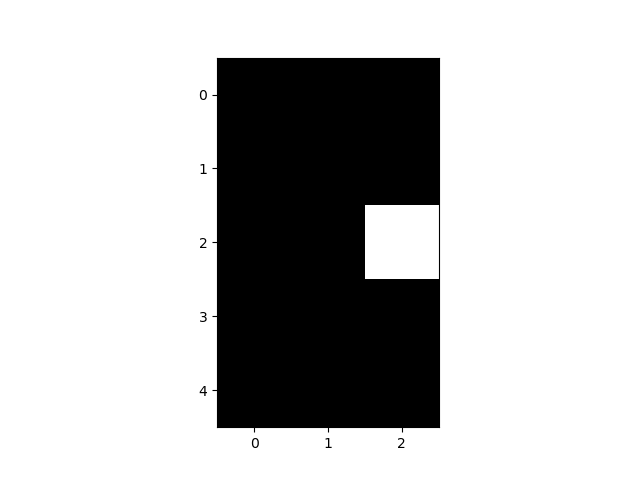

In [4]:
import os
import numpy as np
import scipy
# If you have matplotlib 1.5 or higher, we can use live plotting!
import matplotlib as mpl
if float(mpl.__version__[:3]) >= 1.5:
    %matplotlib notebook
else:
    %matplotlib inline
    
import matplotlib.pyplot as plt
import time

def per_shift(mat):

    matShift = mat
        
    # center (0, 0)
    # stays constant
    
    # east (0,1)
    ch = 1
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=1, axis=1)
    # north (-1, 0)
    ch = 2
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=-1, axis=0)
    # west (0, -1)
    ch = 3
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=-1, axis=1)
    # south (1, 0)
    ch = 4
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=1, axis=0)
    # north-east (-1, 1)
    ch = 5
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=-1, axis=0), shift=1, axis=1)
    # north-west (-1, -1)
    ch = 6 
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=-1, axis=0), shift=-1, axis=1)    
    # south-west (1, -1)
    ch = 7
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=1, axis=0), shift=-1, axis=1)    
    # south-east (1, 1)
    ch = 8
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=1, axis=0), shift=1, axis=1)  
            
    return matShift

rows = 7
cols = 5
q = 9
timesteps = 6

latt = np.zeros((rows, cols, q), dtype = float)
# initial lattice occupation


fig = plt.gcf()
fig.show()
fig.canvas.draw()

for i in range(1,q):
    ch = i
    latt[1, 2, ch] = 1.0
    # loop over timesteps
    for t in range(timesteps):
        latt = per_shift(latt)
        plt.imshow(latt[:,:,ch], cmap='gray',  interpolation='nearest')
        fig.canvas.draw()
 



In [ ]:
import os
import numpy as np
import scipy
# If you have matplotlib 1.5 or higher, we can use live plotting!
import matplotlib as mpl
if float(mpl.__version__[:3]) >= 1.5:
    %matplotlib notebook
else:
    %matplotlib inline
    
import matplotlib.pyplot as plt
import time


rows = 3
cols = 3
q = 9
timesteps = 5

c = np.array([[0,0], [0,1], [-1,0], [0,-1], [1,0], [-1,1], [-1,-1], [1,-1], [1,1]])

latt = np.zeros((rows, cols, q), dtype = float)
# initial lattice occupation
ch = 5

latt[:, :, 0] = 4/9
latt[:, :, 1:4] = 1/9
latt[:, :, 5:8] = 1/36


def per_shift(mat):
    
    matShift = mat
        
    # center (0,0)
    # stays constant
        
    # east (0,1)
    ch = 1
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=1, axis=1)
        
    # north (-1, 0)
    ch = 2
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=-1, axis=0)
        
    # west (0, -1)
    ch = 3
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=-1, axis=1)
        
    # south (1, 0)
    ch = 4
    matShift[:, :, ch] = np.roll(matShift[:, :, ch], shift=1, axis=0)
        
    # north-east(-1, 1)
    ch = 5
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=-1, axis=0), shift=1, axis=1)
        
    # north-west(-1, -1)
    ch = 6
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=-1, axis=0), shift=-1, axis=1)
        
    # south-west(1, -1)
    ch = 7
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=1, axis=0), shift=-1, axis=1)
        
    # south-east(1, 1)
    ch = 8
    matShift[:, :, ch] = np.roll(np.roll(matShift[:, :, ch], shift=1, axis=0), shift=1, axis=1)
            
    return matShift


'''
def optimierung(mat):
    
    matShift = mat
    
    c = np.array([[0, 0, -1, 0, 1, 1, -1, -1, 1], [0, -1, 0, 1, 0, -1, -1, 1, 1]])
    #c1 = np.array[[0, 1, 0, -1, 0, 1, -1, -1, 1], [0, 0, 1, 0, -1, 1, 1, -1, -1]]
    
    # Funktionieren nicht mit der Schleife, da i sonst auserhalb des Arrays zugreift
    #c2 = np.array[[0,0], [1,0], [0,1], [-1,0], [0,-1], [1,1], [-1,1], [-1,-1], [1,-1]]
    #c3 = np.array[[0,0], [0,1], [-1,0], [0,-1], [1,0], [-1,1], [-1,-1], [1,-1], [1,1]]

    # von 1 bis 8 für die Channels
    for i in range (1,9):
        print (i)
        print (c[1,i])
        print (c[0,i])
        matShift = np.roll(np.roll(matShift[:, :, i], shift=c[1,i], axis=0), shift=c[0,i], axis=1)
    return matShift
'''

def sum_occ(mat):
    occ = np.sum(mat, axis=2, dtype=float)
    pMax = np.ones(occ.shape) + 1e-6
    np.testing.assert_array_less(occ, pMax)
    return occ





'''def calc_dir(c):
    direction = np.zeros(9, dtype=float)
    for i in range(9):
        direction[i] = np.sqrt(c[0,i]**2 + c[1,i]**2)
    return direction

def calc_j_test(direction, occ):
    j = np.zeros(9, dtype=float)
    for i in range(9):
        j = direction[i] * occ[i]
    return j'''



def calc_j(cVec, mat):
    
    return mat.dot(cVec)


j = calc_j(c, latt)
roh = sum_occ(latt)
print(j.shape, roh.shape)
u = j / roh.reshape(roh.shape[0], roh.shape[1], 1)


#for t in range(timesteps):
#latt = per_shift(latt)
    
    
